In [70]:
import re 
import math 
#import eli5

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

import sklearn 
#from eli5.sklearn import PermutationImportance
from urllib.parse import urlparse 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier

#import tensorflow as tf
#from tensorflow.keras import layers
#from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.callbacks import ReduceLROnPlateau

#from sklearn.inspection import PartialDependenceDisplay

#import joblib

In [71]:
PATH = '../data/test_dataset/CSIC2010/csic_database.csv'
df = pd.read_csv(PATH)
display(df.head())

,Unnamed: 0,Method,User-Agent,Pragma,Cache-Control,Accept,Accept-encoding,Accept-charset,language,host,cookie,content-type,connection,lenght,content,classification,URL
0,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/index.jsp HTTP/1.1
1,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/publico/anadir.j...
2,Normal,POST,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=933185092E0B668B90676E0A2B0767AF,application/x-www-form-urlencoded,Connection: close,Content-Length: 68,id=3&nombre=Vino+Rioja&precio=100&cantidad=55&...,0,http://localhost:8080/tienda1/publico/anadir.j...
3,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/publico/autentic...
4,Normal,POST,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=7104E6C68A6BCF1423DAE990CE49FEE2,application/x-www-form-urlencoded,Connection: close,Content-Length: 63,modo=entrar&login=choong&pwd=d1se3ci%F3n&remem...,0,http://localhost:8080/tienda1/publico/autentic...


In [72]:
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Number of samples: 61065
Number of features: 17


In [73]:
df.tail()

,Unnamed: 0,Method,User-Agent,Pragma,Cache-Control,Accept,Accept-encoding,Accept-charset,language,host,cookie,content-type,connection,lenght,content,classification,URL
61060,Anomalous,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=62216ADBBD9B91E17CA9AFEDCCC36275,NaN,close,NaN,NaN,1,http://localhost:8080/tienda1/miembros/editar....
61061,Anomalous,POST,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=2317F5C0B1B7FAD18EB425E98DB102A3,application/x-www-form-urlencoded,Connection: close,Content-Length: 255,modo=registro&login=beaumont&password=quEratIt...,1,http://localhost:8080/tienda1/miembros/editar....
61062,Anomalous,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=7F0BA54A88B849EF752006D388E15CDD,NaN,close,NaN,NaN,1,http://localhost:8080/tienda1/miembros/editar....
61063,Anomalous,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=FB018FFB06011CFABD60D8E8AD58CA21,NaN,close,NaN,NaN,1,http://localhost:8080/tienda1/imagenes/3.gif/ ...
61064,Anomalous,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=3CC12010CDA952F123240EBAD79B55CC,NaN,close,NaN,NaN,1,http://localhost:8080/tienda1/imagenes/nuestra...


In [74]:
df.columns

Index(['Unnamed: 0', 'Method', 'User-Agent', 'Pragma', 'Cache-Control',
       'Accept', 'Accept-encoding', 'Accept-charset', 'language', 'host',
       'cookie', 'content-type', 'connection', 'lenght', 'content',
       'classification', 'URL'],
      dtype='object')

<Axes: xlabel='Unnamed: 0', ylabel='count'>

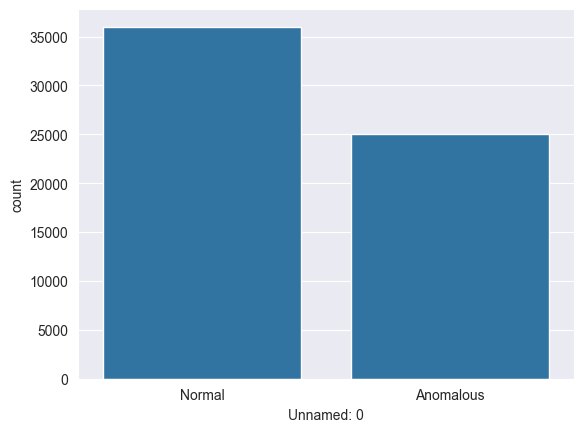

In [75]:
sns.set_style("darkgrid")
sns.countplot(data=df, x='Unnamed: 0')

Dropping samples with at least 1 NaN value will make to lose all the other Request Methods besides POST, this option is discarded since dropping data is not usually a good choice

In [76]:
feature_name = df.columns
print(feature_name)

Index(['Unnamed: 0', 'Method', 'User-Agent', 'Pragma', 'Cache-Control',
       'Accept', 'Accept-encoding', 'Accept-charset', 'language', 'host',
       'cookie', 'content-type', 'connection', 'lenght', 'content',
       'classification', 'URL'],
      dtype='object')


In [77]:
total_features = [
  'Unnamed: 0', 
  'Method', 
  'User-Agent', 
  'Pragma', 
  'Cache-Control',
  'Accept', 
  'Accept-encoding', 
  'Accept-charset', 
  'language', 
  'host',
  'cookie', 
  'content-type', 
  'connection', 
  'lenght', 
  'content',
  'classification', 
  'URL'
]

In [78]:
X = df[total_features]
print(X)

      Unnamed: 0  ...                                                URL
0         Normal  ...   http://localhost:8080/tienda1/index.jsp HTTP/1.1
1         Normal  ...  http://localhost:8080/tienda1/publico/anadir.j...
2         Normal  ...  http://localhost:8080/tienda1/publico/anadir.j...
3         Normal  ...  http://localhost:8080/tienda1/publico/autentic...
4         Normal  ...  http://localhost:8080/tienda1/publico/autentic...
...          ...  ...                                                ...
61060  Anomalous  ...  http://localhost:8080/tienda1/miembros/editar....
61061  Anomalous  ...  http://localhost:8080/tienda1/miembros/editar....
61062  Anomalous  ...  http://localhost:8080/tienda1/miembros/editar....
61063  Anomalous  ...  http://localhost:8080/tienda1/imagenes/3.gif/ ...
61064  Anomalous  ...  http://localhost:8080/tienda1/imagenes/nuestra...

[61065 rows x 17 columns]


#### Removing not discriminatory features
Enumerating unique values for each feature

In [79]:
# Removing not discriminatory features and making some adjustments on feature names
X = X.rename(columns={'Unnamed: 0': 'Class'})
X = X.rename(columns={'lenght': 'content_length'})

feature_names = [
  'Class',
  'Method',
  'host',
  'cookie',
  'Accept', 
  'content_length', 
  'content',
  'classification',
  'URL'
]
X = X[feature_names]
print(X)

           Class  ...                                                URL
0         Normal  ...   http://localhost:8080/tienda1/index.jsp HTTP/1.1
1         Normal  ...  http://localhost:8080/tienda1/publico/anadir.j...
2         Normal  ...  http://localhost:8080/tienda1/publico/anadir.j...
3         Normal  ...  http://localhost:8080/tienda1/publico/autentic...
4         Normal  ...  http://localhost:8080/tienda1/publico/autentic...
...          ...  ...                                                ...
61060  Anomalous  ...  http://localhost:8080/tienda1/miembros/editar....
61061  Anomalous  ...  http://localhost:8080/tienda1/miembros/editar....
61062  Anomalous  ...  http://localhost:8080/tienda1/miembros/editar....
61063  Anomalous  ...  http://localhost:8080/tienda1/imagenes/3.gif/ ...
61064  Anomalous  ...  http://localhost:8080/tienda1/imagenes/nuestra...

[61065 rows x 9 columns]


In [80]:
y=X.Class
print(y)

0           Normal
1           Normal
2           Normal
3           Normal
4           Normal
           ...    
61060    Anomalous
61061    Anomalous
61062    Anomalous
61063    Anomalous
61064    Anomalous
Name: Class, Length: 61065, dtype: object


In [81]:
size = X.shape[1]
# Get list of categorical variables
s = (X.dtypes == 'object')
object_cols = list(s[s].index)

print(f"Categorical variables: {object_cols}")

Categorical variables: ['Class', 'Method', 'host', 'cookie', 'Accept', 'content_length', 'content', 'URL']


Load Models

#### Pre-Processing on the feature: Content Length

In [82]:
print(X.content_length)

0                        NaN
1                        NaN
2         Content-Length: 68
3                        NaN
4         Content-Length: 63
                ...         
61060                    NaN
61061    Content-Length: 255
61062                    NaN
61063                    NaN
61064                    NaN
Name: content_length, Length: 61065, dtype: object


Operations on the 'content_lenght' feature

In [83]:
# replace NaN values with 0
# removing the 'content-lenght' string and keeping only the numerical value 
X['content_length'] = X['content_length'].astype(str)
X['content_length'] = X['content_length'].str.extract(r'(\d+)')
X['content_length'] = pd.to_numeric(X['content_length'], errors='coerce').fillna(0)
print(X.content_length)

0          0.0
1          0.0
2         68.0
3          0.0
4         63.0
         ...  
61060      0.0
61061    255.0
61062      0.0
61063      0.0
61064      0.0
Name: content_length, Length: 61065, dtype: float64


GET methods have the content_length set to 0 since they where all NaN (this method does not have to provide content)



In [84]:
filtered_length = X.loc[X['Method'] == 'GET', 'content_length']
print(filtered_length)


0        0.0
1        0.0
3        0.0
5        0.0
7        0.0
        ... 
61058    0.0
61060    0.0
61062    0.0
61063    0.0
61064    0.0
Name: content_length, Length: 43088, dtype: float64


URL PRE-PROCESSING

In [85]:
url_counts = X['URL'].value_counts()
most_common_urls = url_counts.head(10)  # Extract the top 10 most common strings

print("Most common URLs:")
for i, (url, count) in enumerate(most_common_urls.items(), 1):
  print(f"{i}. URL: {url} - Count: {count}")

Most common URLs:
1. URL: http://localhost:8080/tienda1/publico/anadir.jsp HTTP/1.1 - Count: 2441
2. URL: http://localhost:8080/tienda1/publico/autenticar.jsp HTTP/1.1 - Count: 2422
3. URL: http://localhost:8080/tienda1/publico/registro.jsp HTTP/1.1 - Count: 2417
4. URL: http://localhost:8080/tienda1/miembros/editar.jsp HTTP/1.1 - Count: 2412
5. URL: http://localhost:8080/tienda1/publico/pagar.jsp HTTP/1.1 - Count: 2379
6. URL: http://localhost:8080/tienda1/publico/caracteristicas.jsp HTTP/1.1 - Count: 2003
7. URL: http://localhost:8080/tienda1/publico/vaciar.jsp HTTP/1.1 - Count: 1965
8. URL: http://localhost:8080/tienda1/publico/entrar.jsp HTTP/1.1 - Count: 1938
9. URL: http://localhost:8080/tienda1/publico/carrito.jsp HTTP/1.1 - Count: 1000
10. URL: http://localhost:8080/tienda1/publico/entrar.jsp?errorMsg=Credenciales+incorrectas HTTP/1.1 - Count: 1000


Utils for URL/Content pre-processing

In [86]:
def count_dot(url):
  count_dot = url.count('.')
  return count_dot

def no_of_dir(url):
  urldir = urlparse(url).path
  return urldir.count('/')

def no_of_embed(url):
  urldir = urlparse(url).path
  return urldir.count('//')

def shortening_service(url):
  match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                    'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                    'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                    'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                    'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                    'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                    'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                    'tr\.im|link\.zip\.net',
                    url)
  if match:
    return 1
  else:
    return 0

def count_http(url):
  return url.count('http')

def count_per(url):
  return url.count('%')

def count_ques(url):
  return url.count('?')

def count_hyphen(url):
  return url.count('-')

def count_equal(url):
  return url.count('=')

def url_length(url):
  return len(str(url))

#Hostname Length
def hostname_length(url):
  return len(urlparse(url).netloc)

import re

def suspicious_words(url):
  score_map = {
    'error': 30,
    'errorMsg': 30,
    'id': 10,
    'errorID': 30,
    'SELECT': 50,
    'FROM': 50,
    'WHERE': 50,
    'DELETE': 50,
    'USERS': 50,
    'DROP': 50,
    'CREATE': 50,
    'INJECTED': 50,
    'TABLE': 50,
    'alert': 30,
    'javascript': 20,
    'cookie': 25,
    '--': 30,
    '.exe': 30,
    '.php': 20,
    '.js': 10,
    'admin': 10,
    'administrator': 10,
    '\'': 30,
    'password': 15,
    'login': 15,
    'incorrect': 20,
    'pwd': 15,
    'tamper': 25,
    'vaciar': 20,
    'carrito': 25,
    'wait': 30,
    'delay': 35,
    'set': 20,
    'steal': 35,
    'hacker': 35,
    'proxy': 35,
    'location': 30,
    'document.cookie': 40,
    'document': 20,
    'set-cookie': 40,
    'create': 40,
    'cmd': 40,
    'dir': 30,
    'shell': 40,
    'reverse': 30,
    'bin': 20,
    'cookiesteal': 40,
    'LIKE': 30,
    'UNION': 35,
    'include': 30,
    'file': 20,
    'tmp': 25,
    'ssh': 40,
    'exec': 30,
    'cat': 25,
    'etc': 30,
    'fetch': 25,
    'eval': 30,
    'wait': 30,
    'malware': 45,
    'ransomware': 45,
    'phishing': 45,
    'exploit': 45,
    'virus': 45,
    'trojan': 45,
    'backdoor': 45,
    'spyware': 45,
    'rootkit': 45,
    'credential': 30,
    'inject': 30,
    'script': 25,
    'iframe': 25,
    'src=': 25,
    'onerror': 30,
    'prompt': 20,
    'confirm': 20,
    'eval': 25,
    'expression': 30,
    'function\(': 20,
    'xmlhttprequest': 30,
    'xhr': 20,
    'window.': 20,
    'document.': 20,
    'cookie': 25,
    'click': 15,
    'mouseover': 15,
    'onload': 20,
    'onunload': 20,
  }

  matches = re.findall(r'(?i)' + '|'.join(score_map.keys()), url)

  total_score = sum(score_map.get(match.lower(), 0) for match in matches)
  return total_score

def digit_count(url):
  digits = 0
  for i in url:
    if i.isnumeric():
      digits = digits + 1
  return digits

def letter_count(url):
  letters = 0
  for i in url:
    if i.isalpha():
      letters += 1
  return letters

def count_special_characters(url):
  special_characters = re.sub(r'[a-zA-Z0-9\s]', '', url)
  count = len(special_characters)
  return count

# Number of Parameters in URL
def number_of_parameters(url):
  params = urlparse(url).query
  return 0 if params == '' else len(params.split('&'))

# Number of Fragments in URL
def number_of_fragments(url):
  frags = urlparse(url).fragment
  return len(frags.split('#')) - 1 if frags == '' else 0

# URL is Encoded
def is_encoded(url):
  return int('%' in url.lower())

def unusual_character_ratio(url):
  total_characters = len(url)
  unusual_characters = re.sub(r'[a-zA-Z0-9\s\-._]', '', url)
  unusual_count = len(unusual_characters)
  ratio = unusual_count / total_characters if total_characters > 0 else 0
  return ratio

<>:14: SyntaxWarning: invalid escape sequence '\.'
<>:15: SyntaxWarning: invalid escape sequence '\.'
<>:16: SyntaxWarning: invalid escape sequence '\.'
<>:17: SyntaxWarning: invalid escape sequence '\.'
<>:18: SyntaxWarning: invalid escape sequence '\.'
<>:19: SyntaxWarning: invalid escape sequence '\.'
<>:20: SyntaxWarning: invalid escape sequence '\.'
<>:21: SyntaxWarning: invalid escape sequence '\.'
<>:132: SyntaxWarning: invalid escape sequence '\('
<>:14: SyntaxWarning: invalid escape sequence '\.'
<>:15: SyntaxWarning: invalid escape sequence '\.'
<>:16: SyntaxWarning: invalid escape sequence '\.'
<>:17: SyntaxWarning: invalid escape sequence '\.'
<>:18: SyntaxWarning: invalid escape sequence '\.'
<>:19: SyntaxWarning: invalid escape sequence '\.'
<>:20: SyntaxWarning: invalid escape sequence '\.'
<>:21: SyntaxWarning: invalid escape sequence '\.'
<>:132: SyntaxWarning: invalid escape sequence '\('
C:\Users\Zkorpion\AppData\Local\Temp\ipykernel_6548\28315158.py:14: SyntaxWarnin

In [87]:
X['count_dot_url'] = X['URL'].apply(count_dot)
X['count_dir_url'] = X['URL'].apply(no_of_dir)
X['count_embed_domain_url'] = X['URL'].apply(no_of_embed)
X['short_url'] = X['URL'].apply(shortening_service)
X['count-http'] = X['URL'].apply(count_http)
X['count%_url'] = X['URL'].apply(count_per)
X['count?_url'] = X['URL'].apply(count_ques)
X['count-_url'] = X['URL'].apply(count_hyphen)
X['count=_url'] = X['URL'].apply(count_equal)
X['hostname_length_url'] = X['URL'].apply(hostname_length)
X['sus_url'] = X['URL'].apply(suspicious_words)
X['count-digits_url'] = X['URL'].apply(digit_count)
X['count-letters_url'] = X['URL'].apply(letter_count)
X['url_length'] = X['URL'].apply(url_length)
X['number_of_parameters_url'] = X['URL'].apply(number_of_parameters)
X['number_of_fragments_url'] = X['URL'].apply(number_of_fragments)
X['is_encoded_url'] = X['URL'].apply(is_encoded)
X['special_count_url'] = X['URL'].apply(count_special_characters)
X['unusual_character_ratio_url'] = X['URL'].apply(unusual_character_ratio)


In [88]:
# Select the features and class variable for plotting
new_features = ['count_dot_url', 'count_dir_url', 'count_embed_domain_url', 'count-http',
                'count%_url', 'count?_url', 'count-_url', 'count=_url', 'url_length', 'hostname_length_url',
                'sus_url', 'count-digits_url', 'count-letters_url', 'number_of_parameters_url',
                'number_of_fragments_url', 'is_encoded_url','special_count_url','unusual_character_ratio_url']

# Create a DataFrame with the selected features
set = X[new_features]

for new_feature in X.columns:
  if new_feature in X.columns:
    unique_count = X[new_feature].nunique()
    print(f"Number of unique values for {new_feature}: {unique_count}")
  else:
    print(f"Column '{new_feature}' does not exist in the DataFrame.")

Number of unique values for Class: 2
Number of unique values for Method: 3
Number of unique values for host: 2
Number of unique values for cookie: 61065
Number of unique values for Accept: 1
Number of unique values for content_length: 383
Number of unique values for content: 12091
Number of unique values for classification: 2
Number of unique values for URL: 13498
Number of unique values for count_dot_url: 9
Number of unique values for count_dir_url: 7
Number of unique values for count_embed_domain_url: 2
Number of unique values for short_url: 2
Number of unique values for count-http: 2
Number of unique values for count%_url: 34
Number of unique values for count?_url: 2
Number of unique values for count-_url: 8
Number of unique values for count=_url: 5
Number of unique values for hostname_length_url: 5
Number of unique values for sus_url: 61
Number of unique values for count-digits_url: 112
Number of unique values for count-letters_url: 259
Number of unique values for url_length: 417
N

In [89]:
# Removing Cookies as Feature 
## cookies are unique for each sample, this feature cannot be used as discriminant 
unique_count = X['cookie'].nunique()
print(f"Count of unique values in 'cookie': {unique_count}")

Count of unique values in 'cookie': 61065


#### Encoding categorical features

In [90]:
X['Accept'] = X['Accept'].astype(str)
X['Accept'] = X['Accept'].str.extract(r'(\d+)')
X['Accept'] = pd.to_numeric(X['Accept'], errors='coerce').fillna(1)

In [91]:
lb_make = LabelEncoder()
X["Method_enc"] = lb_make.fit_transform(X["Method"])
X["host_enc"] =lb_make.fit_transform(X["host"])
X["Accept_enc"] =lb_make.fit_transform(X["Accept"])

In [94]:
unique_count_met = X["Method_enc"].nunique()
unique_count_host = X["host_enc"].nunique()
unique_count_acc = X["Accept_enc"].nunique()


print(f"Number of unique values for 'Method_enc': {unique_count_met}")
print(f"Number of unique values for 'host_enc': {unique_count_host}")
print(f"Number of unique values for 'Accept_enc': {unique_count_acc}")


Number of unique values for 'Method_enc': 3
Number of unique values for 'host_enc': 2
Number of unique values for 'Accept_enc': 2


In [95]:
X.head()

,Class,Method,host,cookie,Accept,content_length,content,classification,URL,count_dot_url,count_dir_url,count_embed_domain_url,short_url,count-http,count%_url,count?_url,count-_url,count=_url,hostname_length_url,sus_url,count-digits_url,count-letters_url,url_length,number_of_parameters_url,number_of_fragments_url,is_encoded_url,special_count_url,unusual_character_ratio_url,Method_enc,host_enc,Accept_enc
0,Normal,GET,localhost:8080,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,0.0,0.0,NaN,0,http://localhost:8080/tienda1/index.jsp HTTP/1.1,2,3,0,0,1,0,0,0,0,14,10,7,31,48,0,0,0,9,0.145833,0,0,0
1,Normal,GET,localhost:8080,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,0.0,0.0,NaN,0,http://localhost:8080/tienda1/publico/anadir.j...,2,3,0,0,1,1,1,0,5,14,115,15,86,126,5,0,1,24,0.174603,0,0,0
2,Normal,POST,localhost:8080,JSESSIONID=933185092E0B668B90676E0A2B0767AF,0.0,68.0,id=3&nombre=Vino+Rioja&precio=100&cantidad=55&...,0,http://localhost:8080/tienda1/publico/anadir.j...,2,4,0,0,1,0,0,0,0,14,40,7,39,57,0,0,0,10,0.140351,1,0,0
3,Normal,GET,localhost:8080,JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0,0.0,0.0,NaN,0,http://localhost:8080/tienda1/publico/autentic...,2,3,0,0,1,1,1,0,5,14,40,11,92,125,5,0,1,21,0.152000,0,0,0
4,Normal,POST,localhost:8080,JSESSIONID=7104E6C68A6BCF1423DAE990CE49FEE2,0.0,63.0,modo=entrar&login=choong&pwd=d1se3ci%F3n&remem...,0,http://localhost:8080/tienda1/publico/autentic...,2,4,0,0,1,0,0,0,0,14,10,7,43,61,0,0,0,10,0.131148,1,0,0


In [47]:
X.tail()

,Class,Method,host,cookie,Accept,content_length,content,classification,URL,count_dot_url,count_dir_url,count_embed_domain_url,short_url,count-http,count%_url,count?_url,count-_url,count=_url,hostname_length_url,sus_url,count-digits_url,count-letters_url,url_length,number_of_parameters_url,number_of_fragments_url,is_encoded_url,special_count_url,unusual_character_ratio_url,Method_enc,host_enc,Accept_enc
61060,Anomalous,GET,localhost:8080,JSESSIONID=62216ADBBD9B91E17CA9AFEDCCC36275,0.0,0.0,NaN,1,http://localhost:8080/tienda1/miembros/editar....,3,3,0,0,1,6,1,0,13,14,80,47,218,314,13,0,1,48,0.143312,0,0,0
61061,Anomalous,POST,localhost:8080,JSESSIONID=2317F5C0B1B7FAD18EB425E98DB102A3,0.0,255.0,modo=registro&login=beaumont&password=quEratIt...,1,http://localhost:8080/tienda1/miembros/editar....,2,4,0,0,1,0,0,0,0,14,10,7,40,58,0,0,0,10,0.137931,1,0,0
61062,Anomalous,GET,localhost:8080,JSESSIONID=7F0BA54A88B849EF752006D388E15CDD,0.0,0.0,NaN,1,http://localhost:8080/tienda1/miembros/editar....,3,4,0,0,1,0,0,0,0,14,10,7,43,62,0,0,0,11,0.129032,0,0,0
61063,Anomalous,GET,localhost:8080,JSESSIONID=FB018FFB06011CFABD60D8E8AD58CA21,0.0,0.0,NaN,1,http://localhost:8080/tienda1/imagenes/3.gif/ ...,2,5,0,0,1,0,0,0,0,14,0,8,34,54,0,0,0,11,0.166667,0,0,0
61064,Anomalous,GET,localhost:8080,JSESSIONID=3CC12010CDA952F123240EBAD79B55CC,0.0,0.0,NaN,1,http://localhost:8080/tienda1/imagenes/nuestra...,3,4,0,0,1,0,0,0,0,14,0,7,50,69,0,0,0,11,0.115942,0,0,0


In [96]:
def apply_to_content(content,function):
  if pd.isna(content):
    return 0
  elif isinstance(content, str):
    return function(content)

#"""
#                'count_dot_content','count_dir_content','count_embed_domain_content','count%_content','count?_content',
#               'count-_content','count=_content','hostname_length_content','sus_content','count_digits_content',
#              'count_letters_content','content_length','number_of_parameters_content','number_of_fragments_content',
#             'is_encoded_content','special_count_content','unusual_character_ratio_content'
#            ]"""

X['count_dot_content'] = X['content'].apply(apply_to_content, function=count_dot)
X['count_dir_content'] = X['content'].apply(apply_to_content, function=no_of_dir)
X['count_embed_domain_content'] = X['content'].apply(apply_to_content, function=no_of_embed)
X['count%_content'] = X['content'].apply(apply_to_content, function=count_per)
X['count?_content'] = X['content'].apply(apply_to_content, function=count_ques)
X['count-_content'] = X['content'].apply(apply_to_content, function=count_hyphen)
X['count=_content'] = X['content'].apply(apply_to_content, function=count_equal)
X['content_length'] = X['content'].apply(apply_to_content, function=url_length)
X['sus_content'] = X['content'].apply(apply_to_content, function=suspicious_words)
X['count_digits_content'] = X['content'].apply(apply_to_content, function=digit_count)
X['count_letters_content'] = X['content'].apply(apply_to_content, function=letter_count)
X['special_count_content'] = X['content'].apply(apply_to_content, function=count_special_characters)
X['is_encoded_content'] = X['content'].apply(apply_to_content, function=is_encoded)
#X['unusual_character_ratio_content'] = X['content'].apply(apply_to_content, function=unusual_character_ratio)


In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the features and class variable for plotting
new_content_features = [
  'count_dot_content', 'count_dir_content', 
  'count_embed_domain_content', 'count%_content', 
  'count?_content', 'count-_content', 
  'count=_content', 'sus_content', 
  'count_digits_content', 'count_letters_content', 
  'content_length', 'is_encoded_content', 
  'special_count_content'
]

# Create a DataFrame with the selected features
selected_features_df = X[new_content_features]

for feature_name in selected_features_df.columns:
  if feature_name in X.columns:
    unique_count = selected_features_df[feature_name].nunique()
    print(f"Number of unique values for {feature_name}: {unique_count}")
  else:
    print(f"Column '{feature_name}' does not exist in the DataFrame.")


Number of unique values for count_dot_content: 8
Number of unique values for count_dir_content: 1
Number of unique values for count_embed_domain_content: 1
Number of unique values for count%_content: 34
Number of unique values for count?_content: 1
Number of unique values for count-_content: 8
Number of unique values for count=_content: 5
Number of unique values for sus_content: 57
Number of unique values for count_digits_content: 111
Number of unique values for count_letters_content: 230
Number of unique values for content_length: 383
Number of unique values for is_encoded_content: 2
Number of unique values for special_count_content: 87


In [98]:
X.columns

Index(['Class', 'Method', 'host', 'cookie', 'Accept', 'content_length',
       'content', 'classification', 'URL', 'count_dot_url', 'count_dir_url',
       'count_embed_domain_url', 'short_url', 'count-http', 'count%_url',
       'count?_url', 'count-_url', 'count=_url', 'hostname_length_url',
       'sus_url', 'count-digits_url', 'count-letters_url', 'url_length',
       'number_of_parameters_url', 'number_of_fragments_url', 'is_encoded_url',
       'special_count_url', 'unusual_character_ratio_url', 'Method_enc',
       'host_enc', 'Accept_enc', 'count_dot_content', 'count_dir_content',
       'count_embed_domain_content', 'count%_content', 'count?_content',
       'count-_content', 'count=_content', 'sus_content',
       'count_digits_content', 'count_letters_content',
       'special_count_content', 'is_encoded_content'],
      dtype='object')

#### Building the final dataset to use for the classification

In [99]:
X.columns

Index(['Class', 'Method', 'host', 'cookie', 'Accept', 'content_length',
       'content', 'classification', 'URL', 'count_dot_url', 'count_dir_url',
       'count_embed_domain_url', 'short_url', 'count-http', 'count%_url',
       'count?_url', 'count-_url', 'count=_url', 'hostname_length_url',
       'sus_url', 'count-digits_url', 'count-letters_url', 'url_length',
       'number_of_parameters_url', 'number_of_fragments_url', 'is_encoded_url',
       'special_count_url', 'unusual_character_ratio_url', 'Method_enc',
       'host_enc', 'Accept_enc', 'count_dot_content', 'count_dir_content',
       'count_embed_domain_content', 'count%_content', 'count?_content',
       'count-_content', 'count=_content', 'sus_content',
       'count_digits_content', 'count_letters_content',
       'special_count_content', 'is_encoded_content'],
      dtype='object')

In [100]:
labels=['count_dot_url', 'count_dir_url', 'count_embed_domain_url', 'count-http',
        'count%_url', 'count?_url', 'count-_url', 'count=_url', 'url_length', 'hostname_length_url',
        'sus_url', 'count-digits_url', 'count-letters_url', 'number_of_parameters_url',
        'is_encoded_url','special_count_url','unusual_character_ratio_url',
        #method
        'Method_enc',
        #content
        'count_dot_content','count%_content',
        'count-_content','count=_content','sus_content','count_digits_content',
        'count_letters_content','content_length',
        'is_encoded_content','special_count_content']
print(X[labels])

       count_dot_url  count_dir_url  ...  is_encoded_content  special_count_content
0                  2              3  ...                   0                      0
1                  2              3  ...                   0                      0
2                  2              4  ...                   1                     13
3                  2              3  ...                   0                      0
4                  2              4  ...                   1                     10
...              ...            ...  ...                 ...                    ...
61060              3              3  ...                   0                      0
61061              2              4  ...                   1                     37
61062              3              4  ...                   0                      0
61063              2              5  ...                   0                      0
61064              3              4  ...                   0                

In [101]:
y=X['classification']
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
61060    1
61061    1
61062    1
61063    1
61064    1
Name: classification, Length: 61065, dtype: int64


In [102]:
print('computing...)')
#split dataset in test and train 
x_tr, x_ts, y_tr, y_ts = train_test_split(X[labels], y, test_size=0.3, random_state=0)

print('Done!')

computing...)
Done!


In [103]:
x_tr.head(5)


,count_dot_url,count_dir_url,count_embed_domain_url,count-http,count%_url,count?_url,count-_url,count=_url,url_length,hostname_length_url,sus_url,count-digits_url,count-letters_url,number_of_parameters_url,is_encoded_url,special_count_url,unusual_character_ratio_url,Method_enc,count_dot_content,count%_content,count-_content,count=_content,sus_content,count_digits_content,count_letters_content,content_length,is_encoded_content,special_count_content
23480,2,3,0,1,0,1,0,1,91,14,60,7,70,1,0,13,0.120879,0,0,0,0,0,0,0,0,0,0,0
45171,2,3,0,1,14,1,2,1,125,14,125,36,58,1,1,30,0.208000,0,0,0,0,0,0,0,0,0,0,0
9460,2,4,0,1,0,0,0,0,57,14,10,7,39,0,0,10,0.140351,0,0,0,0,0,0,0,0,0,0,0
9905,2,3,0,1,0,1,0,1,71,14,20,8,50,1,0,12,0.140845,0,0,0,0,0,0,0,0,0,0,0
8937,2,4,0,1,0,0,0,0,57,14,10,7,39,0,0,10,0.140351,1,0,0,0,1,50,0,31,33,0,2


In [104]:
x_tr.tail(5)


,count_dot_url,count_dir_url,count_embed_domain_url,count-http,count%_url,count?_url,count-_url,count=_url,url_length,hostname_length_url,sus_url,count-digits_url,count-letters_url,number_of_parameters_url,is_encoded_url,special_count_url,unusual_character_ratio_url,Method_enc,count_dot_content,count%_content,count-_content,count=_content,sus_content,count_digits_content,count_letters_content,content_length,is_encoded_content,special_count_content
45891,2,3,0,1,0,1,0,1,76,14,75,8,54,1,0,13,0.144737,0,0,0,0,0,0,0,0,0,0,0
52416,2,4,0,1,0,0,0,0,57,14,10,7,39,0,0,10,0.140351,1,0,0,0,1,50,0,32,34,0,2
42613,2,3,0,1,0,1,0,3,95,14,30,11,67,3,0,16,0.147368,0,0,0,0,0,0,0,0,0,0,0
43567,3,3,0,1,4,1,0,13,324,14,80,48,226,13,1,49,0.141975,0,0,0,0,0,0,0,0,0,0,0
2732,2,4,0,1,0,0,0,0,53,14,0,8,34,0,0,10,0.150943,0,0,0,0,0,0,0,0,0,0,0


#### Classifiers

In [105]:
random_forest_model = RandomForestClassifier(random_state=1000)
print('Computing....')
# Fit the model
random_forest_model.fit(x_tr,y_tr)
print('Done!')


Computing....
Done!


In [106]:
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(random_forest_model, threshold="mean")
X_train_selected = selector.transform(x_tr)
X_test_selected = selector.transform(x_ts)

svm = SVC(kernel='rbf', C=2, gamma='scale')  # You can tune these hyperparameters
svm.fit(X_train_selected, y_tr)


d:\Projects\cyber-attack-predictor\.env\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
d:\Projects\cyber-attack-predictor\.env\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


,C,2
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [107]:
y_pred = svm.predict(X_test_selected)
accuracy = accuracy_score(y_ts, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_ts, y_pred))


Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.86      0.78     10753
           1       0.73      0.52      0.61      7567

    accuracy                           0.72     18320
   macro avg       0.72      0.69      0.70     18320
weighted avg       0.72      0.72      0.71     18320



In [62]:
RT_predictions= random_forest_model.predict(x_ts)
print('MAE', mean_absolute_error(y_ts, RT_predictions))
print("Accuracy", accuracy_score(y_ts, RT_predictions))
print("Precision", precision_score(y_ts, RT_predictions, average='weighted', labels=np.unique(RT_predictions)))
print("Recall", recall_score(y_ts, RT_predictions, average='weighted', labels=np.unique(RT_predictions)))
print("F1", f1_score(y_ts, RT_predictions, average='weighted', labels=np.unique(RT_predictions)))
print("ROC AUC", roc_auc_score(y_ts, RT_predictions, average='weighted', labels=np.unique(RT_predictions)))
error_rt = (RT_predictions != y_ts).mean()
print("Test error: {:.1%}".format(error_rt))


# save the model 
filename = 'APPLICATION LAYER.sav'
joblib.dump(random_forest_model, open(filename, 'wb')) 


MAE 0.07374454148471615
Accuracy 0.9262554585152838
Precision 0.9261917594808624
Recall 0.9262554585152838
F1 0.9262150260558555
ROC AUC 0.9234171756395833
Test error: 7.4%


In [63]:
print(y_tr.unique())
print(y_tr.name)


[0 1]
classification


In [64]:
x_ts = x_ts.reset_index(drop=True)
y_ts = y_ts.reset_index(drop=True)

for k in range(np.unique(y_ts).size):
  print('mean of class ' + str(k) + ':\n', x_ts[y_ts == k].mean(axis=0))


mean of class 0:
 count_dot_url                   2.072631
count_dir_url                   3.831210
count_embed_domain_url          0.000000
count-http                      1.000000
count%_url                      0.273319
count?_url                      0.221706
count-_url                      0.024644
count=_url                      1.173812
url_length                     79.160606
hostname_length_url            14.000000
sus_url                        21.204315
count-digits_url                9.812703
count-letters_url              55.086766
number_of_parameters_url        1.173812
is_encoded_url                  0.090951
special_count_url              13.261136
unusual_character_ratio_url     0.140332
Method_enc                      0.226448
count_dot_content               0.073189
count%_content                  0.272110
count-_content                  0.024644
count=_content                  1.189529
sus_content                    10.676090
count_digits_content            2.77104

In [65]:
print(classification_report(y_ts, RT_predictions, target_names = ['Normal (class 0)','Anomalous (class 1)']))


                     precision    recall  f1-score   support

   Normal (class 0)       0.93      0.94      0.94     10753
Anomalous (class 1)       0.91      0.91      0.91      7567

           accuracy                           0.93     18320
          macro avg       0.92      0.92      0.92     18320
       weighted avg       0.93      0.93      0.93     18320



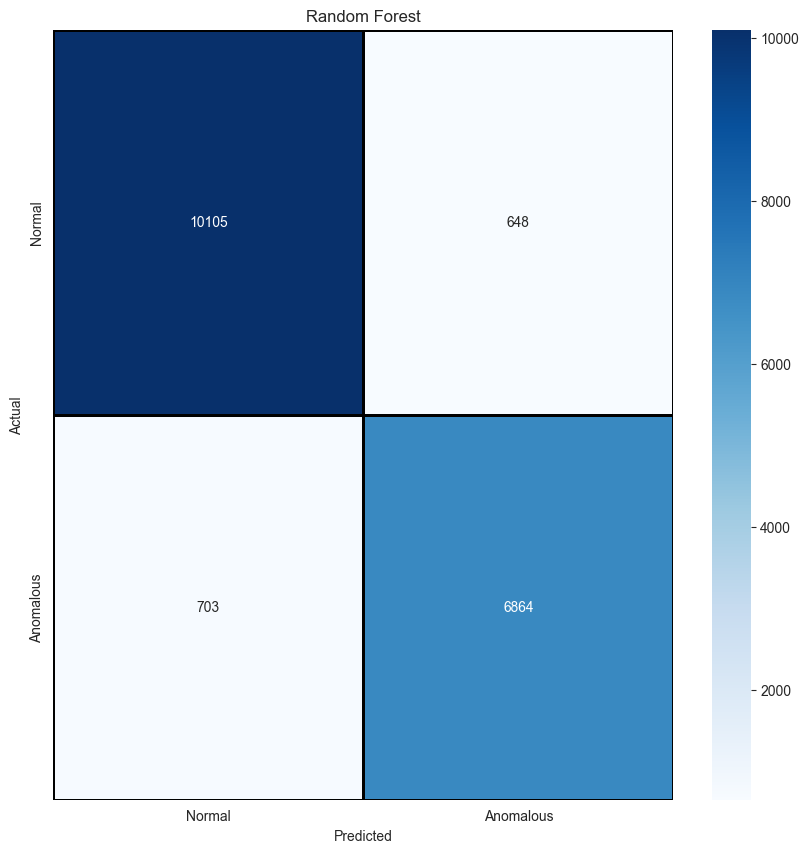

In [66]:
label = ['Normal', 'Anomalous']
cm = confusion_matrix(y_ts, RT_predictions)
cm = pd.DataFrame(cm, index=['0', '1'], columns=['0', '1'])

plt.figure(figsize=(10, 10))
sns.heatmap(cm, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='', xticklabels=label, yticklabels=label)
plt.title("Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [67]:
DT_model = DecisionTreeClassifier(random_state=2)
print('Computing....')
DT_model.fit(x_tr,y_tr)
print('Done!')

Computing....
Done!


In [68]:
DT_predictions= DT_model.predict(x_ts)
print('MAE', mean_absolute_error(y_ts, DT_predictions))
print("Accuracy", accuracy_score(y_ts, DT_predictions))
print("Precision", precision_score(y_ts, DT_predictions, average='weighted', labels=np.unique(DT_predictions)))
print("Recall", recall_score(y_ts, DT_predictions, average='weighted', labels=np.unique(DT_predictions)))
print("F1", f1_score(y_ts, DT_predictions, average='weighted', labels=np.unique(DT_predictions)))
print("ROC AUC", roc_auc_score(y_ts, DT_predictions, average='weighted', labels=np.unique(DT_predictions)))
error_dt = (DT_predictions != y_ts).mean()
print("Test error: {:.1%}".format(error_dt))


MAE 0.08133187772925764
Accuracy 0.9186681222707423
Precision 0.9185504062924272
Recall 0.9186681222707423
F1 0.9185072169864832
ROC AUC 0.9142717136873706
Test error: 8.1%


<Axes: title={'center': 'Decision Tree'}>

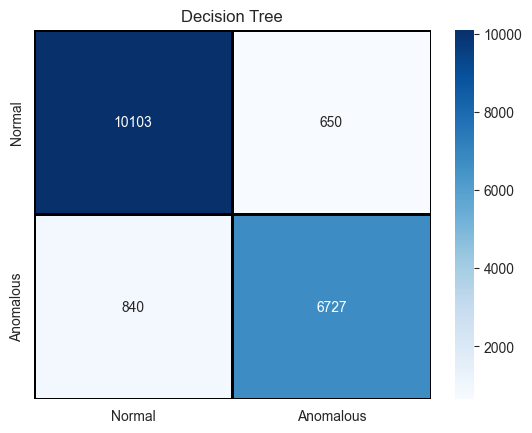

In [69]:
cm = confusion_matrix(y_ts,DT_predictions)
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.title("Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = label,yticklabels = label)
